In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Datasets/NIFTY_PHARMA(unprocessed).csv')
data_merged = data
df = pd.DataFrame(data)
df.head()

,Date,Open,High,Low,Close,Volume
0,1/31/2011 15:30:00,4633.30,4700.60,4593.90,4689.80,0
1,02-01-2011 15:30,4705.80,4723.95,4598.10,4629.25,0
2,02-02-2011 15:30,4643.65,4672.30,4603.25,4630.20,0
3,02-03-2011 15:30,4618.95,4662.35,4605.40,4640.90,0
4,02-04-2011 15:30,4637.85,4679.55,4557.10,4573.25,0


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Volume
2611,09-03-2021 15:30,14506.05,14553.40,14399.25,14485.65,0
2612,09-06-2021 15:30,14540.95,14562.25,14449.25,14481.55,0
2613,09-07-2021 15:30,14488.05,14503.30,14341.50,14387.35,0
2614,09-08-2021 15:30,14396.80,14410.90,14248.00,14349.45,0
2615,09-09-2021 15:30,14300.30,14339.65,14247.80,14329.85,0


In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Datasets/Sun_Pharma.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Datasets/DR_Reddy.csv')
data3 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Datasets/Cipla.csv')
data4 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Datasets/Divis_Lab.csv')
data5 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Datasets/Lupin.csv')

In [ ]:
print(data1.shape)
print(data2.shape)
print(data3.shape)
print(data4.shape)
print(data5.shape)
print(data.shape)

(2619, 6)
(2619, 6)
(2618, 6)
(2614, 6)
(2618, 6)
(2616, 6)


In [ ]:
data_merged['Sun_Pharma'] = data1['Close']
data_merged['DR_Reddy'] = data2['Close']
data_merged['Cipla'] = data3['Close']
data_merged['Divis_Lab'] = data4['Close']
data_merged['Lupin'] = data5['Close']

In [ ]:
df_merged = pd.DataFrame(data_merged)

In [ ]:
df_merged = df_merged.drop(['Open'], axis=1)
df_merged = df_merged.drop(['High'],  axis=1)
df_merged = df_merged.drop(['Low'],  axis=1)
df_merged = df_merged.drop(['Volume'],  axis=1)
df_merged = df_merged.drop(['Date'],  axis=1)

In [ ]:
df_merged.rename(columns = {'Close':'Pharma_Index'}, inplace = True)

In [ ]:
df_merged = df_merged[2096:2446]

In [ ]:
corr = df_merged.corr()
corr

,Pharma_Index,Sun_Pharma,DR_Reddy,Cipla,Divis_Lab,Lupin
Pharma_Index,1.000000,0.937226,0.969933,0.981512,0.940018,0.926567
Sun_Pharma,0.937226,1.000000,0.855968,0.907932,0.835631,0.895239
DR_Reddy,0.969933,0.855968,1.000000,0.963194,0.945044,0.884778
Cipla,0.981512,0.907932,0.963194,1.000000,0.915008,0.945770
Divis_Lab,0.940018,0.835631,0.945044,0.915008,1.000000,0.787800
Lupin,0.926567,0.895239,0.884778,0.945770,0.787800,1.000000


In [ ]:
df = df.drop(['Volume'], axis=1)
df.head()

,Date,Open,High,Low,Close
0,1/31/2011 15:30:00,4633.30,4700.60,4593.90,4689.80
1,02-01-2011 15:30,4705.80,4723.95,4598.10,4629.25
2,02-02-2011 15:30,4643.65,4672.30,4603.25,4630.20
3,02-03-2011 15:30,4618.95,4662.35,4605.40,4640.90
4,02-04-2011 15:30,4637.85,4679.55,4557.10,4573.25


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = [i.date() for i in df['Date']]

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,2011-01-31,4633.30,4700.60,4593.90,4689.80
1,2011-02-01,4705.80,4723.95,4598.10,4629.25
2,2011-02-02,4643.65,4672.30,4603.25,4630.20
3,2011-02-03,4618.95,4662.35,4605.40,4640.90
4,2011-02-04,4637.85,4679.55,4557.10,4573.25


In [ ]:
from datetime import datetime

In [ ]:
'''
first wave

start = datetime.strptime('2019-07-30','%Y-%M-%d').date()
end = datetime.strptime('2020-03-14','%Y-%M-%d').date()
pre_covid_data = df.loc[(df['Date'] >= start) & (df['Date'] <= end)]

start = datetime.strptime('2020-03-15','%Y-%M-%d').date()
end = datetime.strptime('2020-12-25','%Y-%M-%d').date()
covid_data = df.loc[(df['Date'] >= start) & (df['Date'] <= end)]


second wave

start = datetime.strptime('2020-12-26','%Y-%M-%d').date()
end = datetime.strptime('2021-03-15','%Y-%M-%d').date()
pre_covid_data2 = df.loc[(df['Date'] > start) & (df['Date'] <= end)]

start = datetime.strptime('2021-03-16','%Y-%M-%d').date()
end = datetime.strptime('2021-07-30','%Y-%M-%d').date()
covid_data2 = df.loc[(df['Date'] > start) & (df['Date'] <= end)]
'''

"\nsecond wave\n\nstart = datetime.strptime('2020-12-26','%Y-%M-%d').date()\nend = datetime.strptime('2021-03-15','%Y-%M-%d').date()\npre_covid_data2 = df.loc[(df['Date'] > start) & (df['Date'] <= end)]\n\nstart = datetime.strptime('2021-03-16','%Y-%M-%d').date()\nend = datetime.strptime('2021-07-30','%Y-%M-%d').date()\ncovid_data2 = df.loc[(df['Date'] > start) & (df['Date'] <= end)]\n"

In [ ]:
pre_covid_data = df[2096:2247]
covid_data = df[2248:2446]

In [ ]:
df_copy = df.copy()

In [ ]:
for i in range(1,len(df)):
  df.loc[i,'Day_percent_change']=(df.loc[i,'Close']-df.loc[i-1,'Close'])/100

In [ ]:
df.dropna(axis = 0, inplace = True)

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],open=df['Open'],high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

In [ ]:
df_copy.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [ ]:
print(df.loc[2025,"Date"])

2019-04-23


In [ ]:
print(covid_data)

            Date     Open     High      Low    Close
2204  2020-01-15  8135.75  8178.85  8080.35  8166.20
2205  2020-01-16  8188.05  8223.85  8175.35  8203.10
2206  2020-01-17  8208.30  8371.60  8200.00  8345.30
2207  2020-01-20  8353.70  8375.20  8251.00  8269.35
2208  2020-01-21  8249.15  8313.45  8214.55  8274.20
2209  2020-01-22  8295.00  8372.30  8245.45  8256.65
2210  2020-01-23  8245.95  8322.45  8208.55  8300.20
2211  2020-01-24  8291.75  8349.25  8273.95  8294.05


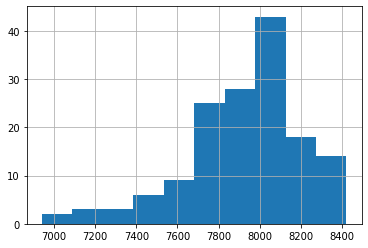

In [ ]:
pre_covid_data['Close'].hist()
plt.show();

In [ ]:
pre_covid_data.describe()

,Open,High,Low,Close
count,151.000000,151.000000,151.000000,151.000000
mean,7938.470199,8012.962583,7855.821192,7931.216225
std,292.283646,266.518174,319.125133,286.256189
min,6558.250000,7256.100000,6242.850000,6942.550000
25%,7798.650000,7868.675000,7717.100000,7786.150000
50%,7991.150000,8073.600000,7925.250000,7976.450000
75%,8107.725000,8169.850000,8045.925000,8104.875000
max,8446.200000,8513.150000,8395.650000,8420.250000


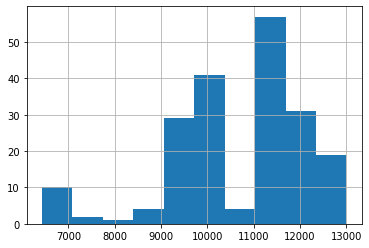

In [ ]:
covid_data['Close'].hist()
plt.show();

In [ ]:
covid_data.describe()

,Open,High,Low,Close
count,198.000000,198.000000,198.000000,198.000000
mean,10678.347980,10803.343182,10544.429293,10664.653283
std,1487.018618,1463.188764,1475.685332,1470.960222
min,6489.500000,6746.300000,6332.000000,6432.300000
25%,9851.425000,9985.012500,9803.650000,9867.537500
50%,11268.600000,11383.250000,11115.700000,11238.525000
75%,11718.812500,11828.600000,11590.325000,11687.887500
max,12989.400000,13045.550000,12875.550000,13001.950000


In [ ]:
def ewma_5(df, column = 'Close'):
    df['ewma_5'] = df[column].ewm(span = 5, adjust = False).mean()
    return df

def ewma_20(df, column = 'Close'):
    df['ewma_20'] = df[column].ewm(span = 20, adjust = False).mean()
    return df

def ewma_50(df, column = 'Close'):
    df['ewma_50'] = df[column].ewm(span = 50, adjust = False).mean()
    return df

def ewma_200(df, column = 'Close'):
    df['ewma_200'] = df[column].ewm(span = 200, adjust = False).mean()
    return df

In [ ]:
print(df3)

            Date      Open      High       Low     Close
2096  2019-08-05   7819.90   7881.85   7735.05   7807.95
2097  2019-08-06   7790.90   7905.90   7783.75   7818.50
2098  2019-08-07   7833.70   7959.95   7823.75   7879.75
2099  2019-08-08   7919.10   7994.10   7854.20   7964.80
2100  2019-08-09   8014.95   8049.10   7896.40   7924.05
...          ...       ...       ...       ...       ...
2441  2020-12-28  12989.40  12995.20  12842.55  12874.35
2442  2020-12-29  12932.30  13006.20  12802.85  12843.90
2443  2020-12-30  12898.60  12898.60  12753.85  12823.90
2444  2020-12-31  12829.75  12986.45  12797.95  12915.90
2445  2021-01-01  12933.10  13045.55  12875.55  13001.95

[350 rows x 5 columns]


In [ ]:
df3 = df[2096:2446]

In [ ]:
df3 = ewma_5(df3)
df3 = ewma_20(df3)
df3 = ewma_50(df3)
df3 = ewma_200(df3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

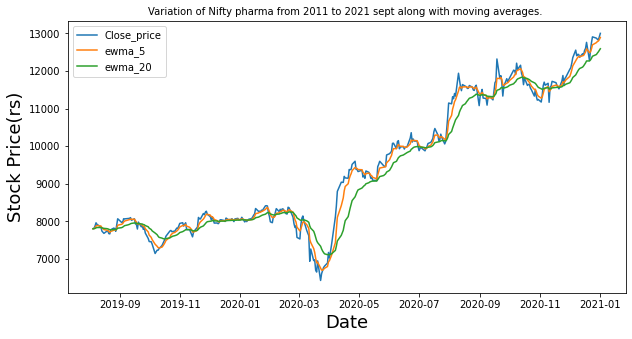

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Variation of Nifty pharma from 2011 to 2021 sept along with moving averages. ', fontsize=10)
df_copy = df3.set_index('Date')
plt.plot(df_copy.Close)
plt.plot(df_copy.ewma_5)
plt.plot(df_copy.ewma_20)
plt.ylabel('Stock Price(rs)', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.legend(['Close_price','ewma_5','ewma_20'], loc='upper left');

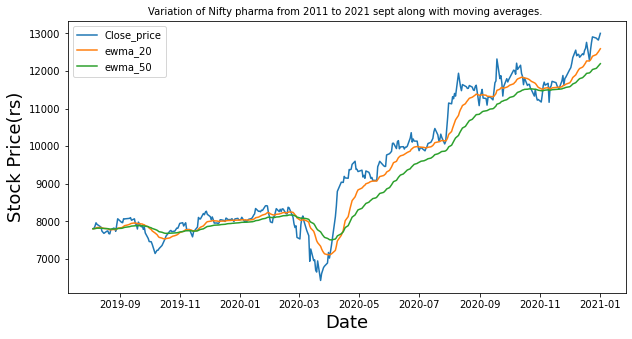

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Variation of Nifty pharma from 2011 to 2021 sept along with moving averages. ', fontsize=10)
df_copy = df3.set_index('Date')
plt.plot(df_copy.Close)
plt.plot(df_copy.ewma_20)
plt.plot(df_copy.ewma_50)
plt.ylabel('Stock Price(rs)', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.legend(['Close_price','ewma_20','ewma_50'], loc='upper left');

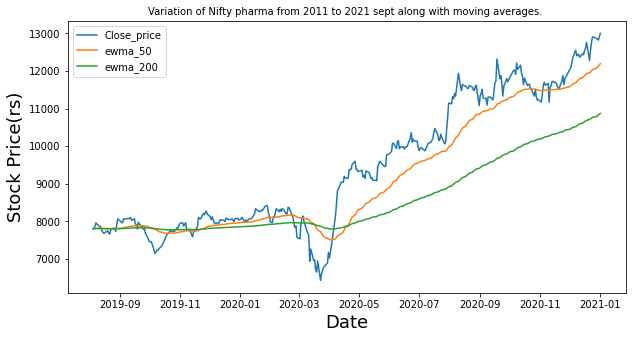

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Variation of Nifty pharma from 2011 to 2021 sept along with moving averages. ', fontsize=10)
df_copy = df3.set_index('Date')
plt.plot(df_copy.Close)
plt.plot(df_copy.ewma_50)
plt.plot(df_copy.ewma_200)
plt.ylabel('Stock Price(rs)', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.legend(['Close_price','ewma_50','ewma_200'], loc='upper left');

In [ ]:
df_copy['ewma_30'] = df_copy['Close'].ewm(span = 30, adjust = False).mean()
df_copy['ewma_100'] = df_copy['Close'].ewm(span = 100, adjust = False).mean()

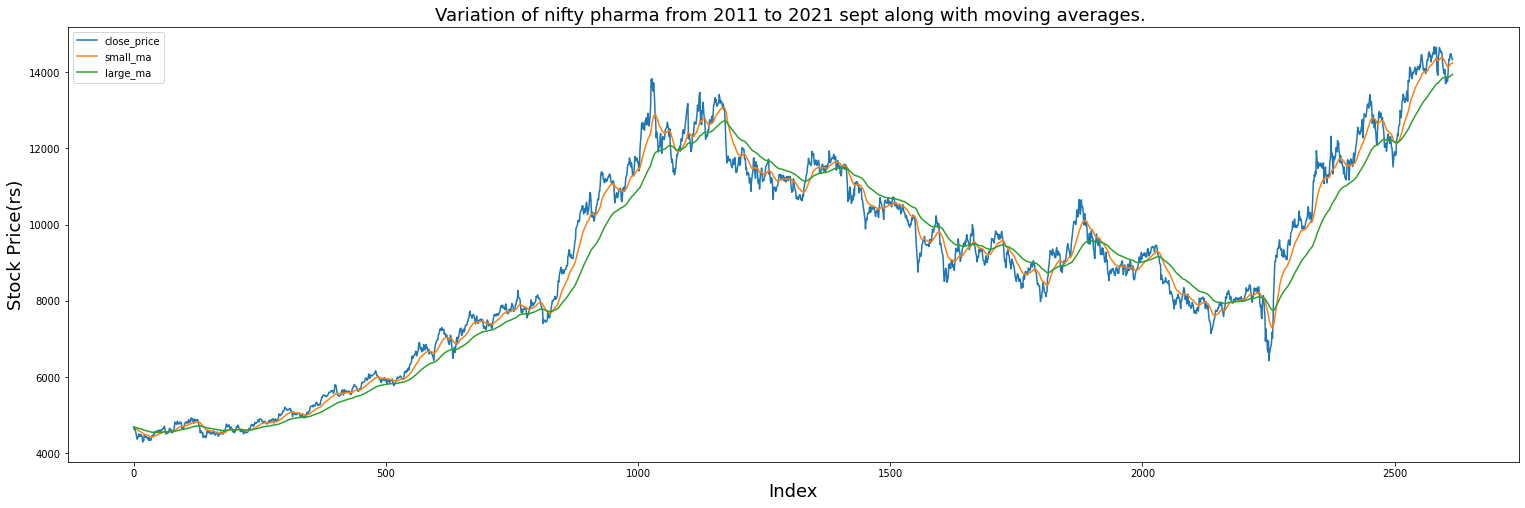

In [ ]:
plt.figure(figsize=(26,8))
plt.title('Variation of nifty pharma from 2011 to 2021 sept along with moving averages. ', fontsize=18)
plt.plot(df_copy.Close)
plt.plot(df_copy.ema_30)
plt.plot(df_copy.ema_100)
plt.ylabel('Stock Price(rs)', fontsize=18)
plt.xlabel('Index', fontsize=18)
plt.legend(['close_price','small_ma','large_ma'], loc='upper left');

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
def plot_moving_average(df, window, column, plot_intervals=False, scale=1.96, plot_slopes=False):

    series = df.Close
    rolling_mean = df[column]
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')

    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
        
    if plot_slopes:
        plt.plot(df['slope_%s' % column], 'm,', label='Slope_MA')
            
    plt.plot(series[window:], label='Actual clsing_price values')
    plt.legend(loc='best')
    plt.grid(True)

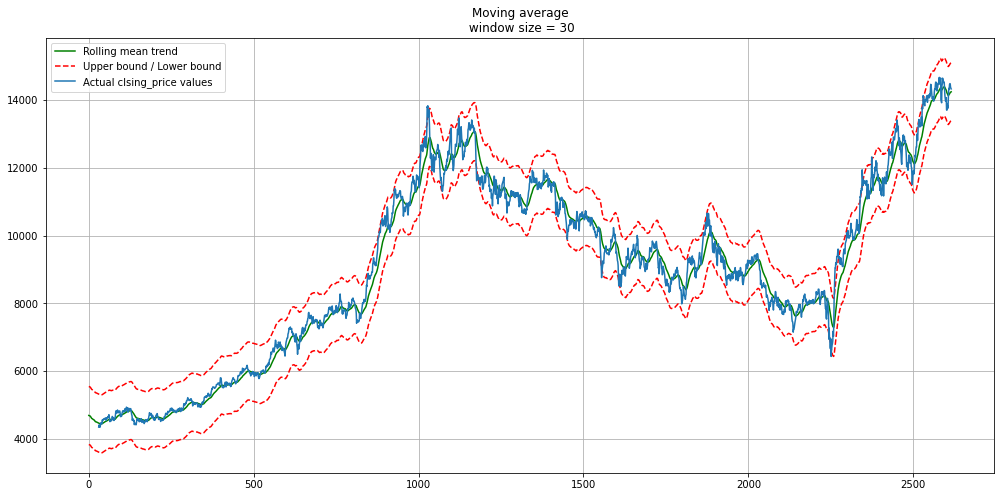

In [ ]:
plot_moving_average(df_copy, 30, column='ewma_30', plot_intervals=True)

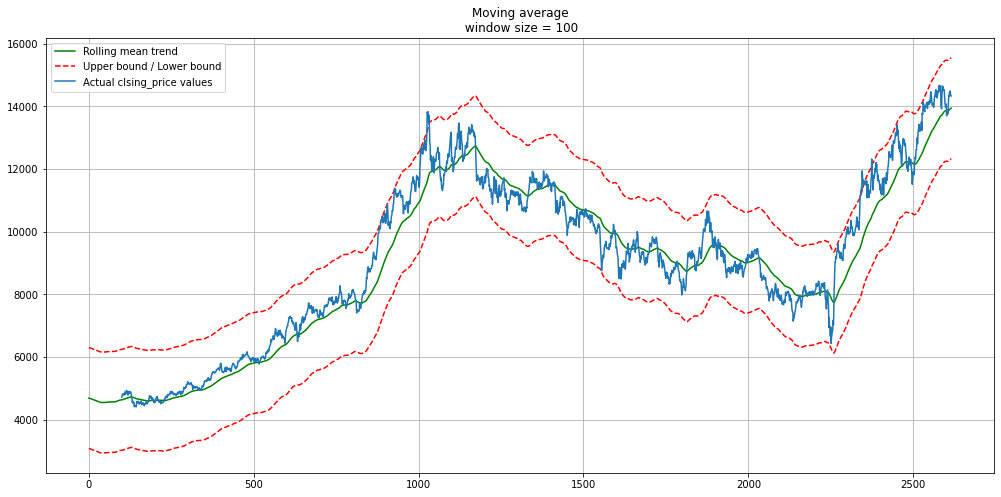

In [ ]:
plot_moving_average(df_copy, 100, column='ewma_100', plot_intervals=True)

In [ ]:
def daily_trend(x):
  if x > -0.5 and x <= 0.5:
    return 'Slight or No change'
  elif x > 0.5 and x <= 1:
    return 'Slight Positive'
  elif x > -1 and x <= -0.5:
    return 'Slight Negative'
  elif x > 1 and x <= 3:
    return 'Positive'
  elif x > -3 and x <= -1:
    return 'Negative'
  elif x > 3 and x <= 7:
    return 'Among top gainers'
  elif x > -7 and x <= -3:
    return 'Among top losers'
  elif x > 7:
    return 'Bull run'
  elif x <= -7:
    return 'Bear drop'

df['Trend']= np.zeros(df['Day_percent_change'].count())
df['Trend']= df['Day_percent_change'].apply(lambda x:daily_trend(x))

In [ ]:
print(df.loc[2400,"Date"])

2020-10-27


In [ ]:
df1 = df[2096:2247]
df2 = df[2248:2446]
df.head()

,Date,Open,High,Low,Close
0,2011-01-31,4633.30,4700.60,4593.90,4689.80
1,2011-02-01,4705.80,4723.95,4598.10,4629.25
2,2011-02-02,4643.65,4672.30,4603.25,4630.20
3,2011-02-03,4618.95,4662.35,4605.40,4640.90
4,2011-02-04,4637.85,4679.55,4557.10,4573.25


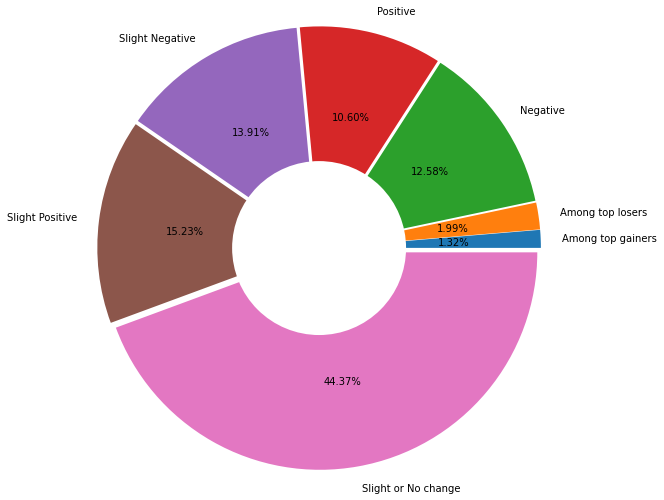

In [ ]:
pie_data1 = df1.groupby('Trend')
pie_label1 = sorted([i for i in df1.loc[:, 'Trend'].unique()])
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(pie_data1['Trend'].count(), labels = pie_label1, autopct = '%2.2f%%', radius = 2.5, explode=explode)
centre_circle = plt.Circle((0, 0), 1, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)

plt.show()

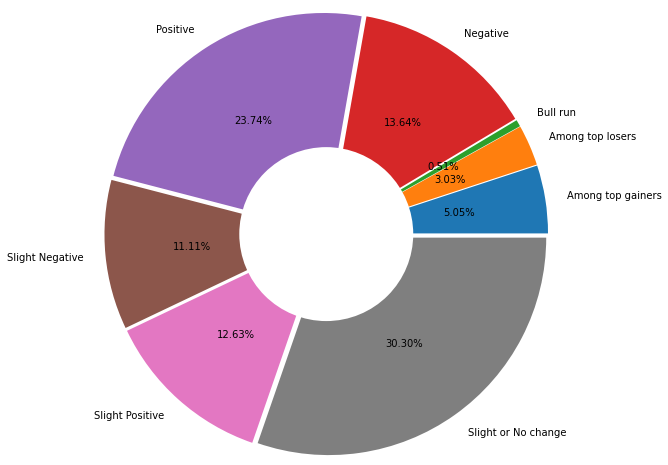

In [ ]:
pie_data2 = df2.groupby('Trend')
pie_label2 = sorted([i for i in df2.loc[:, 'Trend'].unique()])
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(pie_data2['Trend'].count(), labels = pie_label2, autopct = '%2.2f%%', radius = 2.5, explode=explode)
centre_circle = plt.Circle((0, 0), 1, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)

plt.show()

In [ ]:
!pip install pandas_ta

     |████████████████████████████████| 115 kB 5.4 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=4cfa7da4b05d6cf628ddcd30b42963386ce8cca0570567f99ebc618baa48ac90
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [ ]:
df1 = df[2096-14:2247]
df2 = df[2248-14:2446]
df.head()

,Date,Open,High,Low,Close
0,2011-01-31,4633.30,4700.60,4593.90,4689.80
1,2011-02-01,4705.80,4723.95,4598.10,4629.25
2,2011-02-02,4643.65,4672.30,4603.25,4630.20
3,2011-02-03,4618.95,4662.35,4605.40,4640.90
4,2011-02-04,4637.85,4679.55,4557.10,4573.25


In [ ]:
import pandas_ta as pta
df1['rsi'] = pta.rsi(df1['Close'], length = 14)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
def rsi_trend(x):
  if x < 25:
    return 'Oversold'
  elif x >= 25 and x < 45:
    return 'Bearish'
  elif x >= 45 and x < 55:
    return 'Neutral'
  elif x >= 55 and x < 75:
    return 'Bullish'
  else:
    return 'Overbought'

In [ ]:
df1['RSI_Trend']= np.zeros(df1['Close'].count())
df1['RSI_Trend']= df1['rsi'].apply(lambda x:rsi_trend(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



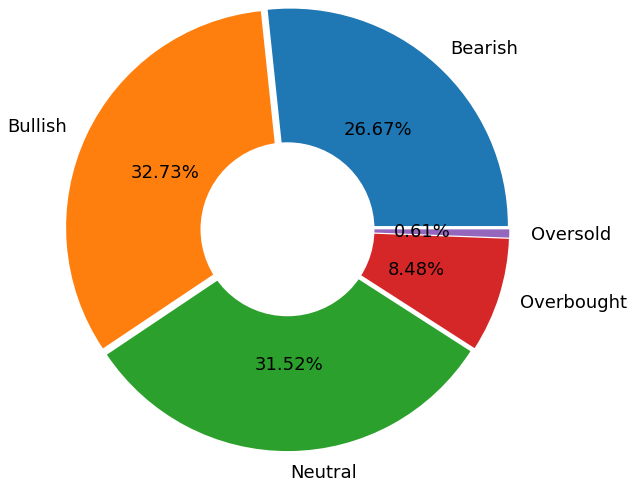

In [ ]:
pie_data1 = df1.groupby('RSI_Trend')
pie_label1 = sorted([i for i in df1.loc[:, 'RSI_Trend'].unique()])
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(pie_data1['RSI_Trend'].count(), labels = pie_label1, autopct = '%2.2f%%', textprops={'fontsize': 18}, radius = 2.5, explode=explode)
centre_circle = plt.Circle((0, 0), 1, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)

plt.show()

In [ ]:
import pandas_ta as pta
df2['rsi'] = pta.rsi(df2['Close'], length = 14)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df2['RSI_Trend']= np.zeros(df2['Close'].count())
df2['RSI_Trend']= df2['rsi'].apply(lambda x:rsi_trend(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



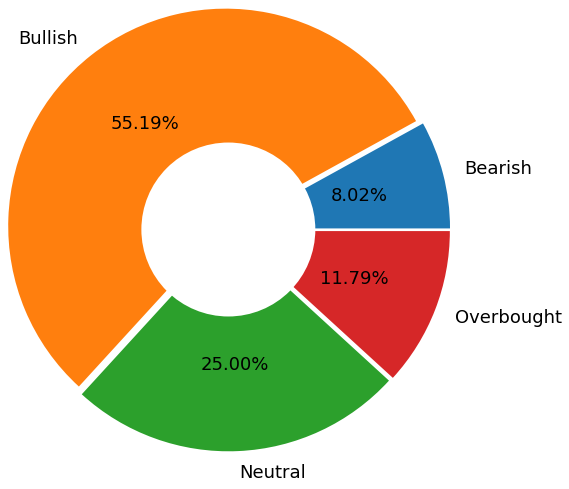

In [ ]:
pie_data2 = df2.groupby('RSI_Trend')
pie_label2 = sorted([i for i in df2.loc[:, 'RSI_Trend'].unique()])
explode = (0.05, 0.05, 0.05, 0.05)
plt.pie(pie_data2['RSI_Trend'].count(), labels = pie_label2, autopct = '%2.2f%%', textprops={'fontsize': 18}, radius = 2.5, explode=explode)
centre_circle = plt.Circle((0, 0), 1, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)

plt.show()

In [ ]:
RSI.mean()

51.959771086953474

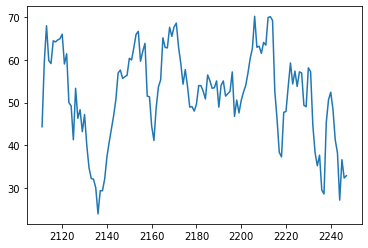

In [ ]:
plt.plot(RSI)

In [ ]:
import pandas_ta as pta
RSI = pta.rsi(df2['Close'], length = 14)

In [ ]:
RSI.mean()

61.69999840874178

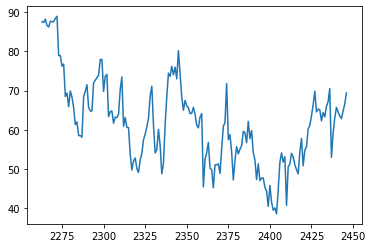

In [ ]:
plt.plot(RSI)

In [ ]:
df1.tail(10)

,Date,Open,High,Low,Close,Day_percent_change,Trend
2238,2020-03-03,7606.80,7966.15,7603.15,7920.60,3.8550,Among top gainers
2239,2020-03-04,7970.00,8131.85,7840.85,8086.55,1.6595,Positive
2240,2020-03-05,8125.90,8281.70,8122.60,8146.00,0.5945,Slight Positive
2241,2020-03-06,7863.10,8057.95,7860.60,8018.30,-1.2770,Negative
2242,2020-03-09,7921.25,7999.30,7698.25,7756.45,-2.6185,Negative
2243,2020-03-11,7754.75,7779.10,7596.35,7623.05,-1.3340,Negative
2244,2020-03-12,7408.40,7423.95,6868.70,6942.55,-6.8050,Among top losers
2245,2020-03-13,6558.25,7469.70,6242.85,7268.00,3.2545,Among top gainers
2246,2020-03-16,7075.35,7406.05,6909.65,6959.35,-3.0865,Among top losers
2247,2020-03-17,7014.50,7289.65,6927.05,6979.10,0.1975,Slight or No change


In [ ]:
df3 = df[2096:2446]

In [ ]:
df3.head(2250)

,Date,Open,High,Low,Close,Day_percent_change,Trend
2097,2019-08-06,7790.90,7905.90,7783.75,7818.50,0.1055,Slight or No change
2098,2019-08-07,7833.70,7959.95,7823.75,7879.75,0.6125,Slight Positive
2099,2019-08-08,7919.10,7994.10,7854.20,7964.80,0.8505,Slight Positive
2100,2019-08-09,8014.95,8049.10,7896.40,7924.05,-0.4075,Slight or No change
2101,2019-08-13,7909.30,7984.85,7789.15,7851.95,-0.7210,Slight Negative
...,...,...,...,...,...,...,...
2442,2020-12-29,12932.30,13006.20,12802.85,12843.90,-0.3045,Slight or No change
2443,2020-12-30,12898.60,12898.60,12753.85,12823.90,-0.2000,Slight or No change
2444,2020-12-31,12829.75,12986.45,12797.95,12915.90,0.9200,Slight Positive
2445,2021-01-01,12933.10,13045.55,12875.55,13001.95,0.8605,Slight Positive


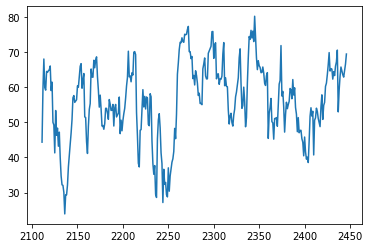

In [ ]:
RSI = pta.rsi(df3['Close'], length = 14)
plt.plot(RSI)

In [ ]:
import pandas_ta as pta
CCI = pta.cci(df1['High'], df1['Low'], df1['Close'], window = 20)

In [ ]:
df1 = df[2096-20:2247]
df2 = df[2248-20:2446]
df.head()

,Date,Open,High,Low,Close
0,2011-01-31,4633.30,4700.60,4593.90,4689.80
1,2011-02-01,4705.80,4723.95,4598.10,4629.25
2,2011-02-02,4643.65,4672.30,4603.25,4630.20
3,2011-02-03,4618.95,4662.35,4605.40,4640.90
4,2011-02-04,4637.85,4679.55,4557.10,4573.25


In [ ]:
import pandas_ta as pta
df1['cci'] = pta.cci(df1['High'], df1['Low'], df1['Close'], window = 20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
def cci_trend(x):
  if x < -200:
    return 'Oversold'
  elif x >= -200 and x < -50:
    return 'Bearish'
  elif x >= -50 and x <= 50:
    return 'Neutral'
  elif x > 50 and x <= 200:
    return 'Bullish'
  else:
    return 'Overbought'

In [ ]:
df1['CCI_Trend']= np.zeros(df1['Close'].count())
df1['CCI_Trend']= df1['cci'].apply(lambda x:cci_trend(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



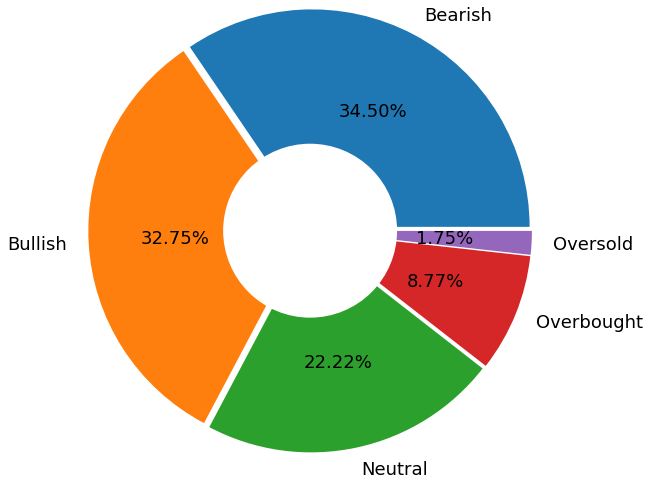

In [ ]:
pie_data1 = df1.groupby('CCI_Trend')
pie_label1 = sorted([i for i in df1.loc[:, 'CCI_Trend'].unique()])
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(pie_data1['CCI_Trend'].count(), labels = pie_label1, autopct = '%2.2f%%', textprops={'fontsize': 18}, radius = 2.5, explode=explode)
centre_circle = plt.Circle((0, 0), 1, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)

plt.show()

In [ ]:
df2['cci'] = pta.cci(df2['High'], df2['Low'], df2['Close'], window = 20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df2['CCI_Trend']= np.zeros(df2['Close'].count())
df2['CCI_Trend']= df2['cci'].apply(lambda x:cci_trend(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



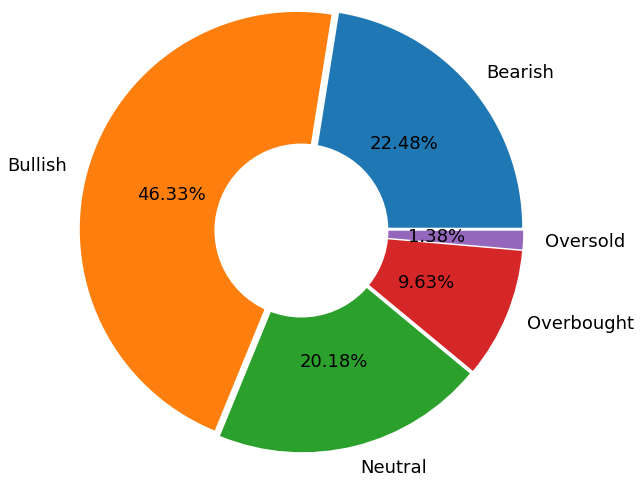

In [ ]:
pie_data2 = df2.groupby('CCI_Trend')
pie_label2 = sorted([i for i in df2.loc[:, 'CCI_Trend'].unique()])
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(pie_data2['CCI_Trend'].count(), labels = pie_label2, autopct = '%2.2f%%', textprops={'fontsize': 18}, radius = 2.5, explode=explode)
centre_circle = plt.Circle((0, 0), 1, fc='white')
fig = plt.gcf()

fig.gca().add_artist(centre_circle)

plt.show()

In [ ]:
df1 = df[2096-14:2247]
df2 = df[2248-14:2446]
df3 = df[2096-14:2446]

In [ ]:
arr = pta.adx(df1['High'], df1['Low'], df1['Close'], window = 14)

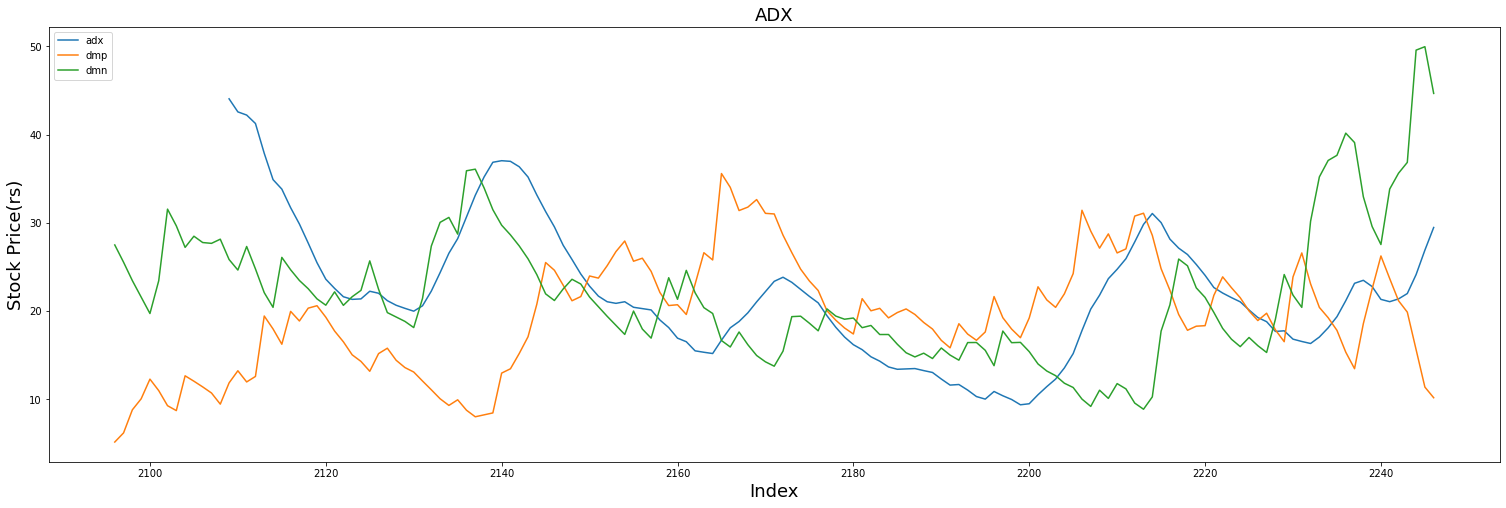

In [ ]:
plt.figure(figsize=(26,8))
plt.title('ADX', fontsize=18)
plt.plot(arr.ADX_14)
plt.plot(arr.DMP_14)
plt.plot(arr.DMN_14)
plt.ylabel('Stock Price(rs)', fontsize=18)
plt.xlabel('Index', fontsize=18)
plt.legend(['adx','dmp','dmn'], loc='upper left');

In [ ]:
arr = pta.adx(df2['High'], df2['Low'], df2['Close'], window = 14)

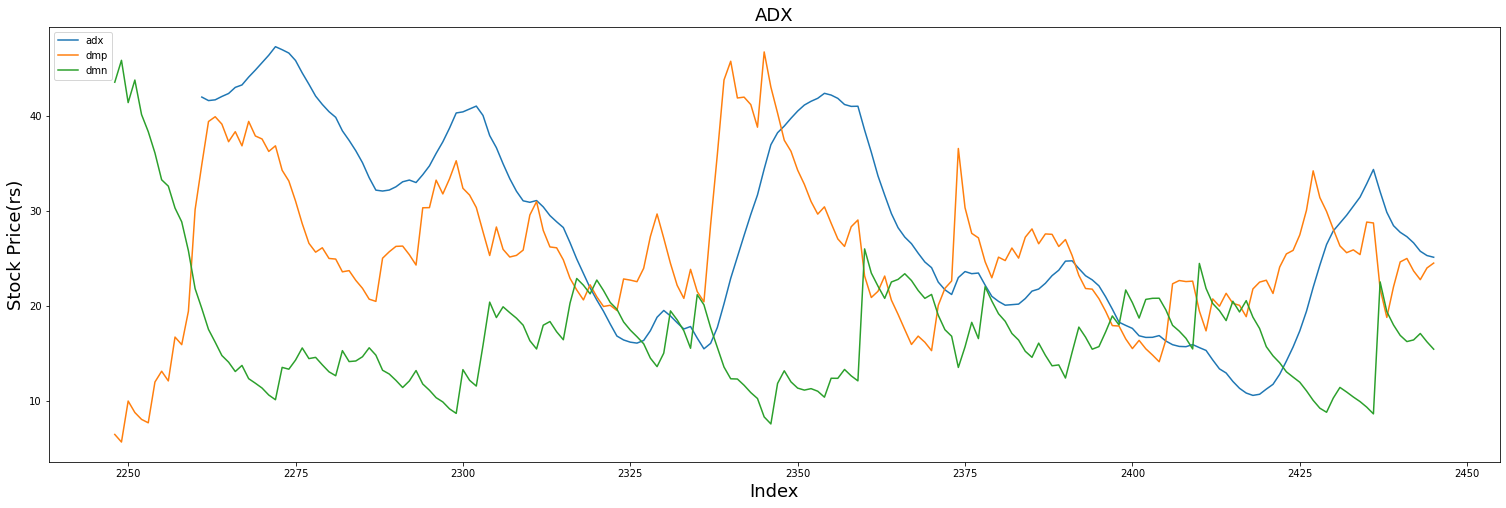

In [ ]:
plt.figure(figsize=(26,8))
plt.title('ADX', fontsize=18)
plt.plot(arr.ADX_14)
plt.plot(arr.DMP_14)
plt.plot(arr.DMN_14)
plt.ylabel('Stock Price(rs)', fontsize=18)
plt.xlabel('Index', fontsize=18)
plt.legend(['adx','dmp','dmn'], loc='upper left');

In [ ]:
arr = pta.adx(df3['High'], df3['Low'], df3['Close'], window = 14)

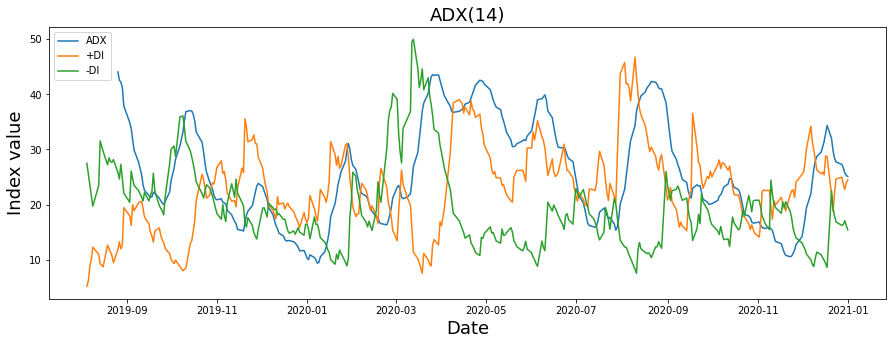

In [ ]:
plt.figure(figsize=(15,5))
arr1 = arr.set_index('Date')
plt.title('ADX(14)', fontsize=18)
plt.plot(arr1.ADX_14)
plt.plot(arr1.DMP_14)
plt.plot(arr1.DMN_14)
plt.ylabel('Index value', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.legend(['ADX','+DI','-DI'], loc='upper left');

In [ ]:
arr['Date'] = df3['Date']

In [ ]:
df1 = df[2096-14:2247]
df2 = df[2248-14:2446]
df3 = df[2096-14:2446]

In [ ]:
arr = pta.macd(df3['Close'], 26, 12, 9)

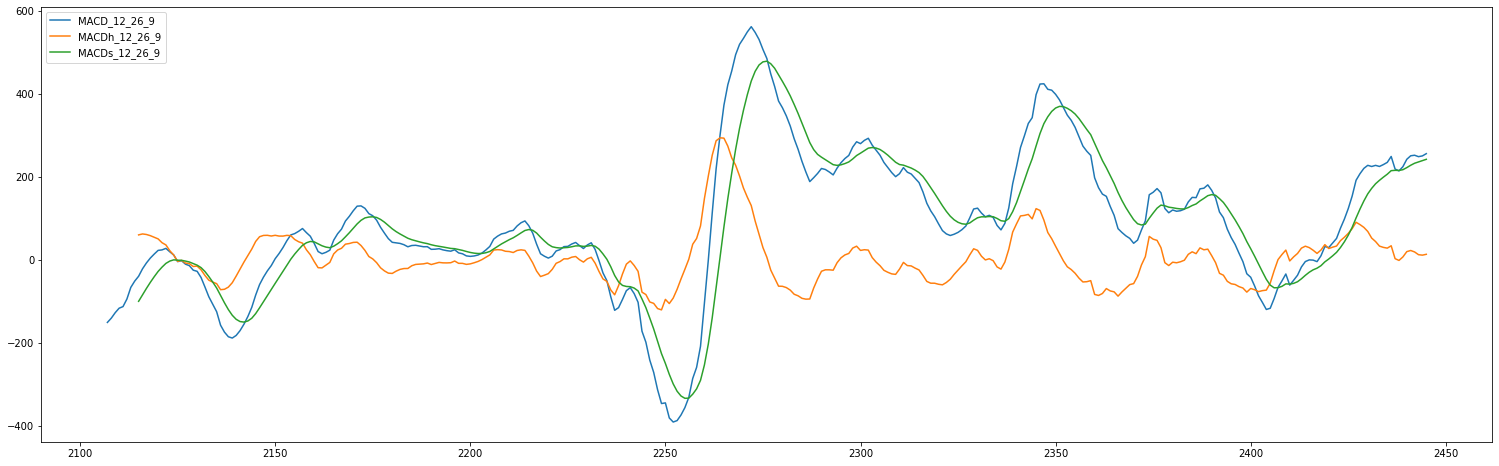

In [ ]:
plt.figure(figsize=(26,8))
plt.plot(arr)
plt.legend(['MACD_12_26_9','MACDh_12_26_9','MACDs_12_26_9'], loc='upper left');

In [ ]:
arr

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
2082,NaN,NaN,NaN
2083,NaN,NaN,NaN
2084,NaN,NaN,NaN
2085,NaN,NaN,NaN
2086,NaN,NaN,NaN
...,...,...,...
2441,251.115419,22.811810,228.303609
2442,252.441133,19.310020,233.131114
2443,249.007535,12.701137,236.306398
2444,250.818732,11.609867,239.208865


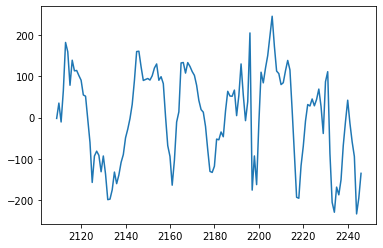

In [ ]:
plt.plot(CCI)

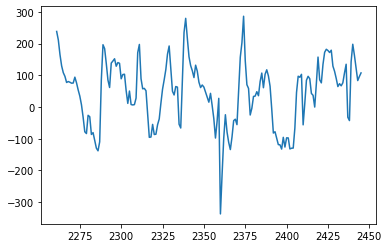

In [ ]:
CCI = pta.cci(df2['High'], df2['Low'], df2['Close'], window = 20)
plt.plot(CCI)

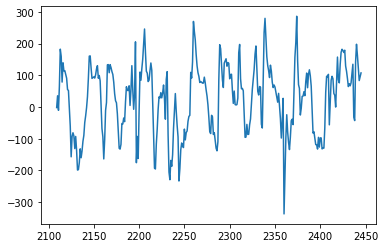

In [ ]:
CCI = pta.cci(df3['High'], df3['Low'], df3['Close'], window = 20)
plt.plot(CCI)

In [ ]:
data11 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Datasets/metrics11.csv')
df11 = pd.DataFrame(data11)
df11.head()

,Date,P/E,P/B,Div Yield
0,01-Aug-2019,33.92,3.22,0.76
1,02-Aug-2019,33.88,3.21,0.76
2,05-Aug-2019,33.62,3.19,0.76
3,06-Aug-2019,33.66,3.19,0.76
4,07-Aug-2019,33.93,3.22,0.76


In [ ]:
df11['Date'] = pd.to_datetime(df11['Date'])
df11['Date'] = [i.date() for i in df11['Date']]

In [ ]:
df11.describe()

,P/E,P/B,Div Yield
count,152.000000,152.000000,152.000000
mean,28.093947,3.108618,0.676974
std,3.090086,0.111052,0.040966
min,21.440000,2.650000,0.620000
25%,25.637500,3.057500,0.650000
50%,26.630000,3.140000,0.660000
75%,30.732500,3.190000,0.690000
max,33.950000,3.280000,0.780000


In [ ]:
data12 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Datasets/metrics12.csv')
df12 = pd.DataFrame(data12)
df12.head()

,Date,P/E,P/B,Div Yield
0,16-Mar-2020,21.49,2.66,0.78
1,17-Mar-2020,21.55,2.67,0.77
2,18-Mar-2020,20.71,2.56,0.81
3,19-Mar-2020,20.55,2.55,0.81
4,20-Mar-2020,21.47,2.66,0.78


In [ ]:
df12['Date'] = pd.to_datetime(df12['Date'])
df12['Date'] = [i.date() for i in df12['Date']]

In [ ]:
df12.describe()

,P/E,P/B,Div Yield
count,200.000000,200.000000,200.000000
mean,31.769450,4.360950,0.650900
std,3.945687,0.735512,0.126114
min,19.870000,2.460000,0.440000
25%,30.175000,3.757500,0.540000
50%,32.370000,4.665000,0.605000
75%,34.215000,4.872500,0.780000
max,38.430000,5.310000,0.840000


In [ ]:
data21 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Datasets/metrics21.csv')
df21 = pd.DataFrame(data21)
df21.head()

,Date,Total Returns Index
0,01-Aug-2019,9366.45
1,02-Aug-2019,9353.92
2,05-Aug-2019,9282.33
3,06-Aug-2019,9294.85
4,07-Aug-2019,9367.66


In [ ]:
df21['Date'] = pd.to_datetime(df21['Date'])
df21['Date'] = [i.date() for i in df21['Date']]

In [ ]:
df21.describe()

,Total Returns Index
count,152.000000
mean,9463.520461
std,327.206563
min,8300.930000
25%,9283.117500
50%,9503.715000
75%,9665.997500
max,10039.500000


In [ ]:
data22 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Datasets/metrics22.csv')
df22 = pd.DataFrame(data22)
df22.head()

,Date,Total Returns Index
0,16-Mar-2020,8321.03
1,17-Mar-2020,8344.61
2,18-Mar-2020,8017.81
3,19-Mar-2020,7967.31
4,20-Mar-2020,8322.12


In [ ]:
df22['Date'] = pd.to_datetime(df22['Date'])
df22['Date'] = [i.date() for i in df22['Date']]

In [ ]:
df22.describe()

,Total Returns Index
count,200.000000
mean,12739.464450
std,1812.808014
min,7704.360000
25%,11768.875000
50%,13480.535000
75%,14029.035000
max,15506.600000


In [ ]:
frames1 = [df11, df12]
frames2 = [df21, df22]

In [ ]:
result1 = pd.concat(frames1)
result2 = pd.concat(frames2)

In [ ]:
result1.rename(columns = {'P/E':'Price_Earnings'}, inplace = True)
result1.rename(columns = {'P/B':'Price_Book'}, inplace = True)
#result1.rename(columns = {'Div Yield':'Div_Yield'}, inplace = True)
result2.rename(columns = {'Total Returns Index':'TRI'}, inplace = True)

In [ ]:
print(result1)

           Date  Price_Earnings  Price_Book  Div_Yield
0    2019-08-01           33.92        3.22       0.76
1    2019-08-02           33.88        3.21       0.76
2    2019-08-05           33.62        3.19       0.76
3    2019-08-06           33.66        3.19       0.76
4    2019-08-07           33.93        3.22       0.76
..          ...             ...         ...        ...
195  2020-12-24           38.41        5.31       0.72
196  2020-12-28           38.30        5.30       0.72
197  2020-12-29           38.21        5.28       0.72
198  2020-12-30           38.15        5.28       0.72
199  2020-12-31           38.43        5.31       0.72

[352 rows x 4 columns]


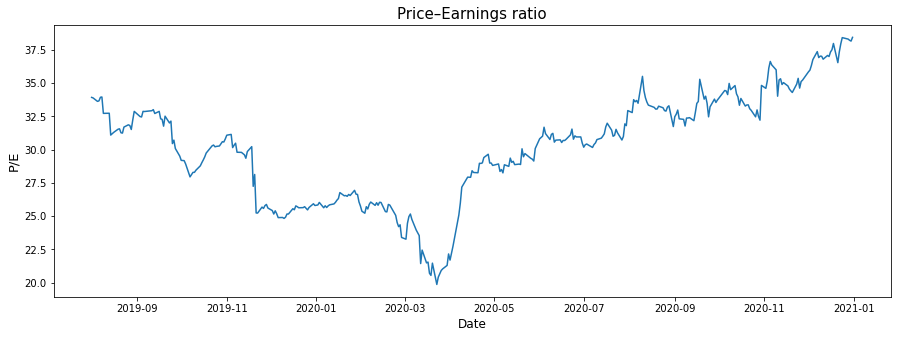

In [ ]:
cd1 = result1.set_index('Date')
plt.figure(figsize=(15,5))
plt.title('Price–Earnings ratio', fontsize= 15)
plt.ylabel('P/E', fontsize=13)
plt.xlabel('Date', fontsize=12)
plt.plot(cd1.Price_Earnings);

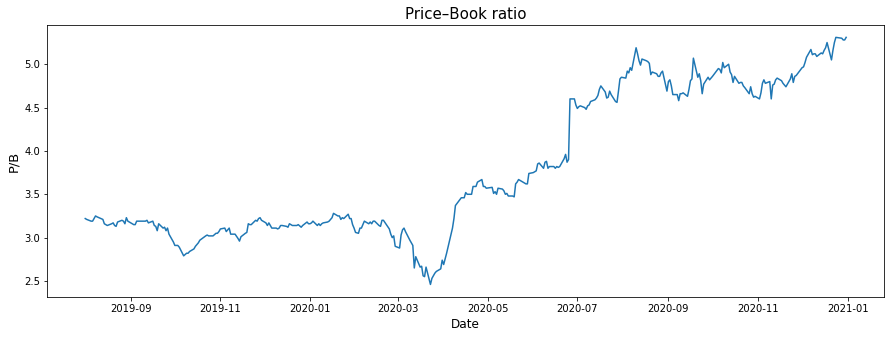

In [ ]:
cd1 = result1.set_index('Date')
plt.figure(figsize=(15,5))
plt.title('Price–Book ratio', fontsize= 15)
plt.ylabel('P/B', fontsize=13)
plt.xlabel('Date', fontsize=12)
plt.plot(cd1.Price_Book);

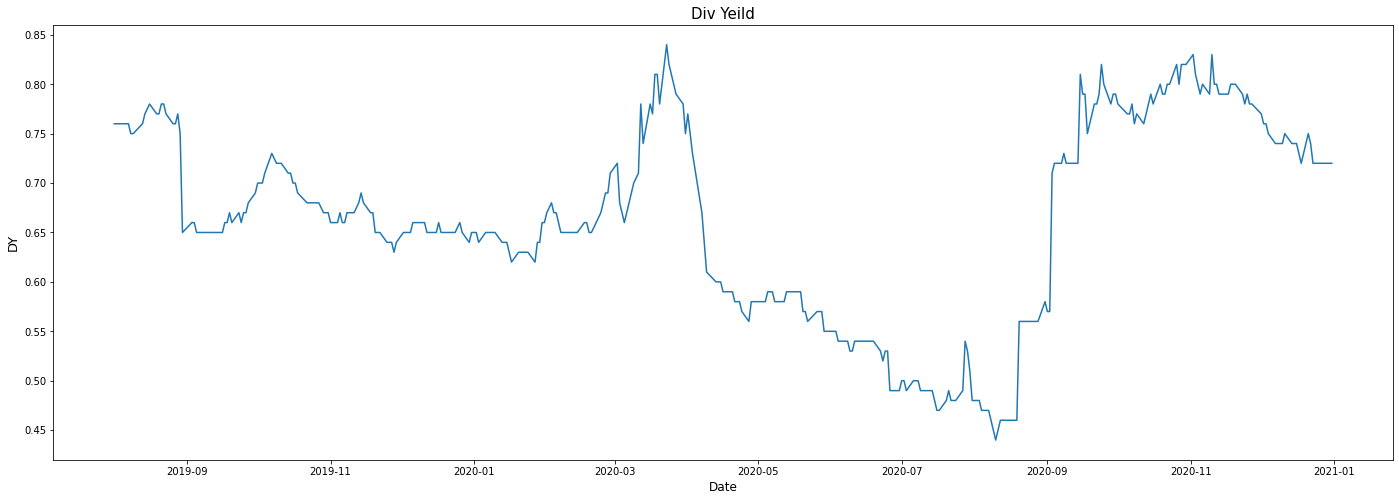

In [ ]:
cd1 = result1.set_index('Date')
plt.figure(figsize=(15,5))
plt.title('Div Yeild', fontsize= 15)
plt.ylabel('DY', fontsize=13)
plt.xlabel('Date', fontsize=12)
plt.plot(cd1.Div_Yield);

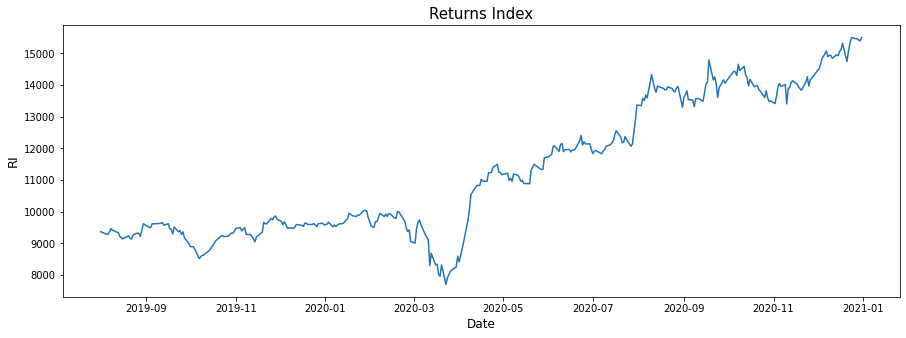

In [ ]:
cd = result2.set_index('Date')
plt.figure(figsize=(15,5))
plt.title('Returns Index', fontsize= 15)
plt.ylabel('RI', fontsize=13)
plt.xlabel('Date', fontsize=12)
plt.plot(cd.TRI);